# Student information

Full name: Huy Le Nhat

Student ID: 20520056

Class: CS410.N11

Github: https://github.com/nhathuyle2002/CS410/tree/main/Task2

In [2]:
# from google.colab import drive
# drive.mount('/content/drive')
# dir_folder = '/content/drive/MyDrive/BaitapUIT/CS410/cs410/Task2'
import os
dir_folder = os.getcwd() 

# Libraries and Functions

In [3]:
import numpy as np

In [4]:
def initialize_population(num_individuals, num_variables, random_seed=20520056):
    # Đặt lại random_seed
    np.random.seed(random_seed)
    
    pop = np.random.randint(2, size=(num_individuals, num_variables))
    # pop = np.array([[]] * num_individuals, dtype=np.int_)
    # for idx in range(num_variables):
    #     column = [x for x in range(2) for i in range(num_individuals//2)]
    #     np.random.shuffle(column)
    #     pop = np.hstack((pop, np.array([column]).T))

    return pop

In [5]:
def onemax(ind):   
    return np.sum(ind)  

In [6]:
def trap5(ind):
    num_parameters = len(ind)
    k = 5
    if num_parameters % k !=0:
        exit(1)
    sum_f = 0
    for id in range(0, num_parameters, k):
        f_trap = sum(ind[id:id+k])
        if f_trap < k:
            f_trap = (k-1) - f_trap
        sum_f += f_trap
    return sum_f

In [7]:
def truncation_selection(pop, pop_fitness, selection_size):
    selected_indices = np.argsort(pop_fitness)[-selection_size:]
    return selected_indices

In [8]:
def tournament_selection(pop, pop_fitness, selection_size, tournament_size=4):
    # num_individuals = len(pop)
    # indices = [idx for idx in range(num_individuals)]
    # selected_indices = []
    # for iter in range(selection_size):
    #     ids = np.random.choice(indices, tournament_size)
    #     ids_fitness = pop_fitness[ids]
    #     idx = ids[np.argmax(ids_fitness)]
    #     selected_indices.append(idx)
    # return selected_indices

    num_individuals = len(pop)
    indices = np.arange(num_individuals * tournament_size) % num_individuals
    np.random.shuffle(indices)
    selected_indices = []
    for iter in range(selection_size):
        ids = indices[iter*tournament_size: (iter+1)*tournament_size]
        ids_fitness = pop_fitness[ids]
        idx = ids[np.argmax(ids_fitness)]
        selected_indices.append(idx)
    return selected_indices

In [9]:
def tournament_selection(pop, pop_fitness, selection_size, tournament_size=4):
    # num_individuals = len(pop)
    # indices = [idx for idx in range(num_individuals)]
    # selected_indices = []
    # for iter in range(selection_size):
    #     ids = np.random.choice(indices, tournament_size)
    #     ids_fitness = pop_fitness[ids]
    #     idx = ids[np.argmax(ids_fitness)]
    #     selected_indices.append(idx)
    # return selected_indices

    num_individuals = len(pop)
    indices = np.arange(num_individuals * tournament_size) % num_individuals
    np.random.shuffle(indices)
    selected_indices = []
    for iter in range(selection_size):
        ids = indices[iter*tournament_size: (iter+1)*tournament_size]
        ids_fitness = pop_fitness[ids]
        selected_indices.append(ids[np.argmax(ids_fitness)])
    return selected_indices

In [10]:
def crossover(pop, crossover_type='UX'):
    num_individuals = len(pop)
    num_parameters = len(pop[0])
    indices = np.arange(num_individuals)
    # Đảo ngẫu nhiên thứ tự các cá thể trong quần thể
    np.random.shuffle(indices)
    offspring = []
    
    for i in range(0, num_individuals, 2):
        idx1 = indices[i]
        idx2 = indices[i+1]
        offspring1 = list(pop[idx1])
        offspring2 = list(pop[idx2])
        
        # Cài đặt phép lai đồng nhất uniform crossover. 
        # Không cần cài đặt đột biến mutation.
        if crossover_type == 'UX':
          for idx in range(0, num_parameters):
              r = np.random.rand()
              if r < 0.5:
                  offspring1[idx], offspring2[idx] = offspring2[idx], offspring1[idx]

        elif crossover_type == '1X':
            crossover_pos = np.random.randint(num_parameters)
            for idx in range(crossover_pos, num_parameters):
                offspring1[idx], offspring2[idx] = offspring2[idx], offspring1[idx]

        elif crossover_type == '2X':
            crossover_pos1, crossover_pos2 = np.random.randint(num_parameters, size=2)
            if crossover_pos1 > crossover_pos2:
                crossover_pos1, crossover_pos2 = crossover_pos2, crossover_pos1
            for idx in range(crossover_pos1, crossover_pos2):
                offspring1[idx], offspring2[idx] = offspring2[idx], offspring1[idx]

        offspring.append(offspring1)
        offspring.append(offspring2)
    
    offspring = np.array(offspring)
    return offspring

In [11]:
def mutation(pop, mutation_prob):
    num_individuals = len(pop)
    num_parameters = len(pop[0])
    for i in range(0, num_individuals):
        for j in range(0, num_parameters):
            r = np.random.rand()
            if r < mutation_prob:
                if pop[i][j] == 0:
                    pop[i][j] = 1
                else:
                    pop[i][j] = 0
    
    return pop

In [12]:
def genetic_algorithm_POPOP(num_individuals, num_parameters, num_generations, crossover_type='UX', fitness_function=onemax, tournament_size=4, enable_mutation=False, random_seed=20520056, details=True):
    # print(num_individuals, num_parameters, num_generations, crossover_type, fitness_function, random_seed)
    num_evaluations = 0
    pop = initialize_population(num_individuals, num_parameters, random_seed)
    pop_fitness = np.array([fitness_function(ind) for ind in pop])
    num_evaluations += num_individuals
    if details == True:
        print('Original population:')
        print(pop)
        print("#Gen 0:")
        print(pop_fitness)
    selection_size = num_individuals
    
    for i in range(num_generations):
        offspring = crossover(pop, crossover_type)
        if enable_mutation == True:
            offspring = mutation(offspring, 0.05)
        offspring_fitness = np.array([fitness_function(ind) for ind in offspring])
        num_evaluations += num_individuals

        pop = np.vstack([pop, offspring])
        pop_fitness = np.concatenate((pop_fitness, offspring_fitness))

        selected_indices = tournament_selection( pop, pop_fitness, selection_size, tournament_size)
        pop = pop[selected_indices]
        pop_fitness = pop_fitness[selected_indices]

        if details == True:
            print(f'#Gen {i+1}:')
            print(pop_fitness) 
    
        if pop_fitness.max() == num_parameters:
            break
        if pop.sum(axis=0).min() == 0:
            return False, num_evaluations
    
    if details == True:
        print('#Final result:')
        print(pop)
        print(pop_fitness)

    if pop_fitness.max() == num_parameters:
        return True, num_evaluations
    else:
        return False, num_evaluations

In [13]:
# Testing
genetic_algorithm_POPOP(num_individuals=4, num_parameters=10, num_generations=50, 
                  crossover_type='1X', fitness_function=trap5, tournament_size=4, enable_mutation=False, 
                        random_seed=20520056, details=True)

Original population:
[[1 0 1 0 1 0 0 1 0 1]
 [0 0 0 1 0 1 1 1 1 1]
 [0 0 0 0 1 1 1 1 1 0]
 [1 1 0 0 0 1 1 1 0 0]]
#Gen 0:
[3 8 3 3]
#Gen 1:
[7 4 7 8]


(False, 8)

# Practice

CS410_Bisection.pdf

In [14]:
problem_sizes_list = [10, 20, 40, 80, 160]
num_problem_sizes = 5
num_repetitions = 10
num_random_seeds = 10
random_seed_0 = 20520056
random_seeds_lists = [[id for id in range(seed, seed+10)] for seed in range(random_seed_0, random_seed_0+100, 10)]
max_upper_bound = 8192
max_num_generations = 50

In [15]:
def calc_POPOPs(id_random_seeds_list=0, crossover_type='UX', fitness_function=onemax, avail_problem_sizes=None, tournament_size=4):
    if avail_problem_sizes == None:
        avail_problem_sizes = [True] * num_problem_sizes
    
    print('ID random seeds list:',id_random_seeds_list)
    best_num_individuals_list = []
    avg_num_evaluations_list = []

    for id in range(len(problem_sizes_list)):
        num_parameters = problem_sizes_list[id]
        print('#Num parameters:', num_parameters, end=' ------- ')
        # Tìm upper_bound của num_individuals
        upper_bound = 4

        if avail_problem_sizes[id] == False:
            upper_bound = max_upper_bound * 2
        elif id > 0:
            last_best_num_individuals = best_num_individuals_list[-1]
            if last_best_num_individuals == -1:
                last_best_num_individuals = max_upper_bound * 2
            while upper_bound < last_best_num_individuals:
                upper_bound = upper_bound * 2

        num_evaluations_list = []
        while upper_bound <= max_upper_bound:
            success = True
            num_evaluations_list_temp = []
            for iter in range(num_repetitions):
                cur_success, num_evaluations = genetic_algorithm_POPOP(num_individuals=upper_bound, num_parameters=num_parameters, num_generations=max_num_generations, 
                                                      crossover_type=crossover_type, fitness_function=fitness_function, tournament_size=tournament_size, 
                                                      enable_mutation=False, 
                                                      random_seed=random_seeds_lists[id_random_seeds_list][iter], details=False)
                num_evaluations_list_temp.append(num_evaluations)
                if cur_success == False:
                    success = False        
                    break
            
            num_evaluations_list = num_evaluations_list_temp
            if success == True:
                break
            else:
                upper_bound *= 2
        
        # Kiểm tra giá trị cận trên > max_upper_bound ?
        lower_bound = 0
        if upper_bound > max_upper_bound:
            upper_bound = lower_bound = -1
        else:
            lower_bound = upper_bound // 2

        # Tìm num_individuals tốt nhất
        while (upper_bound - lower_bound > 2) and ((upper_bound - lower_bound) / upper_bound > 0.1) :
            middle = (lower_bound + upper_bound) // 2
            if middle % 2 == 1:
                middle += 1

            success = True
            num_evaluations_list_temp = []
            for iter in range(num_repetitions):
                cur_success, _ = genetic_algorithm_POPOP(num_individuals=middle, num_parameters=num_parameters, num_generations=max_num_generations, 
                                                      crossover_type=crossover_type, fitness_function=fitness_function, tournament_size=tournament_size, 
                                                      enable_mutation=False, 
                                                      random_seed=random_seeds_lists[id_random_seeds_list][iter], details=False)
                num_evaluations_list_temp.append(num_evaluations)
                if cur_success == False:
                    success = False
                    break
            if success == True:
                num_evaluations_list = num_evaluations_list_temp
                upper_bound = middle
            else:
                lower_bound = middle

        best_num_individuals_list.append(upper_bound)
        print('The best number of individuals =', best_num_individuals_list[-1], end=' ---------- ')
        avg_num_evaluations_list.append(np.mean(num_evaluations_list))
        print('The average number of evaluations =', avg_num_evaluations_list[-1])
    
    return best_num_individuals_list, avg_num_evaluations_list

In [16]:
def solve(crossover_type = '1X', fitness_function = onemax):
    '''
    Format output file: a txt file includes 10 repetitions as:
        - line 1: index of random_seeds_list
        - line 2: best_num_individuals_list
        - line 3: avg_num_evaluations_list
    '''
    print(f'------------------- {crossover_type} + {fitness_function.__name__} ------------------')
    path_output_file = os.path.join(dir_folder, f'results/result_{fitness_function.__name__}_{crossover_type}.txt')
    print('Result saves at:', path_output_file)
    output_file = open(path_output_file, 'w')

    avail_problem_sizes = [True] * num_problem_sizes
    for id_random_seeds_list in range(len(random_seeds_lists)):
        print(id_random_seeds_list, file = output_file)
        best_num_individuals_list, avg_num_evaluations_list = calc_POPOPs(id_random_seeds_list, crossover_type, fitness_function, avail_problem_sizes)
        for id in range(num_problem_sizes):
            if best_num_individuals_list[id] == -1:
                avail_problem_sizes[id] = False
        print(*best_num_individuals_list, file=output_file)
        print(*avg_num_evaluations_list, file=output_file)

    output_file.close()

## Onemax

In [17]:
# solve(crossover_type = '1X', fitness_function = onemax)

In [18]:
# solve(crossover_type = 'UX', fitness_function = onemax)

## Trap k=5

In [19]:
# solve(crossover_type = '1X', fitness_function = trap5)

In [20]:
# solve(crossover_type = 'UX', fitness_function = trap5)

# Summary

In [21]:
import pandas as pd 
from matplotlib import pyplot as plt

In [22]:
problem_sizes_list = [10, 20, 40, 80, 160]
num_problem_sizes = 5
num_repetitions = 10
num_random_seeds = 10
random_seed_0 = 20520056
random_seeds_lists = [[id for id in range(seed, seed+10)] for seed in range(random_seed_0, random_seed_0+100, 10)]
max_upper_bound = 8192
max_num_generations = 50

In [23]:
def calMeanStd(crossover_type='1X', fitness_function=onemax):
    input_file = open(os.path.join(dir_folder, f'results/result_{fitness_function.__name__}_{crossover_type}.txt'), 'r')
    data = list(map(float, input_file.read().split()))
    mrps_list = []
    avg_num_evaluations_list = []
    df = {'problem_size': [], 'id_random_seed': [], 'avg_best_num_individuals': [], 'avg_num_evaluations': []}

    for iter in range(num_problem_sizes):
        avail = True
        num_individuals_list = []
        num_evaluations_list = []
        
        for idx_data in range(iter+1, len(data), 11):
            num_individuals_list.append(data[idx_data])
            num_evaluations_list.append(data[idx_data+5])
            if num_individuals_list[-1] == -1:
                num_individuals_list[-1] = -1
                num_evaluations_list[-1] = -1
                avail = False

            df['problem_size'].append(problem_sizes_list[iter])
            df['id_random_seed'].append(idx_data//11)
            df['avg_best_num_individuals'].append(num_individuals_list[-1])
            df['avg_num_evaluations'].append(num_evaluations_list[-1])
                
        if avail == True:
            mrps_list.append((np.mean(num_individuals_list), np.std(num_individuals_list)))
            avg_num_evaluations_list.append((np.mean(num_evaluations_list), np.std(num_evaluations_list)))
        else:
            mrps_list.append((-1, 0))
            avg_num_evaluations_list.append((-1, 0))

    df = pd.DataFrame(df)
    df.to_csv(os.path.join(dir_folder, f'results/result_{fitness_function.__name__}_{crossover_type}.csv'), index=False)
    mrps_list = np.array(mrps_list)
    avg_num_evaluations_list = np.array(avg_num_evaluations_list)
    return mrps_list, avg_num_evaluations_list

In [24]:
def statisticize(fitness_function=onemax):
    tdf, tdf_to_save = {}, {}
    tdf[' '] = pd.concat({'Problem_size': pd.DataFrame(problem_sizes_list, columns=[' '])}, axis=1)
    tdf_to_save[' '] = pd.DataFrame(problem_sizes_list, columns=['Problem_size'])

    for crossover_type in ['1X', 'UX']:
        mrps_list, avg_eval_list = calMeanStd(crossover_type, fitness_function)
        df = {'MRPS': pd.DataFrame(mrps_list, columns=['mean', 'std']), 'Evaluations': pd.DataFrame(avg_eval_list, columns=['mean', 'std'])}
        tdf['sGA-'+crossover_type] = pd.concat(df, axis=1)

        df = {'MRPS': [f'{x} ({y})' for x, y in np.round(mrps_list, 1)], 'Evaluations': [f'{x} ({y})' for x, y in np.round(avg_eval_list, 1)]}
        tdf_to_save['sGA-'+crossover_type] = pd.DataFrame(df)

    tdf = pd.concat(tdf, axis=1)
    tdf_to_save = pd.concat(tdf_to_save, axis=1)
    tdf_to_save.to_csv(os.path.join(dir_folder, f'results/statistics_result_{fitness_function.__name__}.csv'), index=False)
    return tdf

In [25]:
def visualize_statistics(df, fitness_function=onemax):
    crossover_types = ['sGA-1X', 'sGA-UX']
    metrics = ['MRPS', 'Evaluations']
    colors = ['blue', 'green']

    for id_metric in range(2):
        plt.title(f'Statistics of {metrics[id_metric]}')
        plt.xlabel('problem_size')
        plt.ylabel(metrics[id_metric])
        for id in range(2):
            stop = num_problem_sizes
            y = df[crossover_types[id], metrics[id_metric], 'mean'].values
            for k in range(num_problem_sizes):
                if y[k] == -1 or y[k] == None:
                    stop = k 
                    break
            x = problem_sizes_list[:stop]
            y = df[crossover_types[id], metrics[id_metric], 'mean'][:stop].values
            yerr = df[crossover_types[id], metrics[id_metric], 'std'][:stop].values
            plt.loglog(base=2)
            plt.errorbar(x, y, yerr=yerr, marker='o', ms=3, label=crossover_types[id], color=colors[id], capsize=2)

        plt.xticks(ticks=problem_sizes_list, labels=problem_sizes_list)
        plt.legend()
        plt.savefig(os.path.join(dir_folder, f'results/visualize_{fitness_function.__name__}_{metrics[id_metric]}.png'))
        plt.show()

## Show 10 successful runs per random seed with specific problem size

In [37]:
tdf = pd.DataFrame({})
for fitness_function in [onemax, trap5]:
    for crossover_type in ['1X', 'UX']:
        df = pd.read_csv(os.path.join(dir_folder, f'results/result_{fitness_function.__name__}_{crossover_type}.csv')) 
        df['crossover_type'] = crossover_type
        df['fitness_function'] = fitness_function.__name__
    tdf = pd.concat((tdf, df), axis=0)
tdf.to_csv(os.path.join(dir_folder, f'results/running_results.csv'))
tdf

,problem_size,id_random_seed,avg_best_num_individuals,avg_num_evaluations,crossover_type,fitness_function
0,10,0,22.0,160.0,UX,onemax
1,10,1,16.0,80.0,UX,onemax
2,10,2,22.0,128.0,UX,onemax
3,10,3,22.0,160.0,UX,onemax
4,10,4,16.0,80.0,UX,onemax
...,...,...,...,...,...,...
45,160,5,-1.0,-1.0,UX,trap5
46,160,6,-1.0,-1.0,UX,trap5
47,160,7,-1.0,-1.0,UX,trap5
48,160,8,-1.0,-1.0,UX,trap5


## Onemax

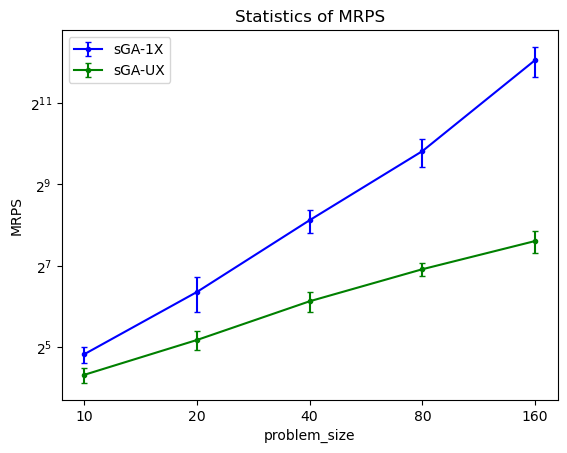

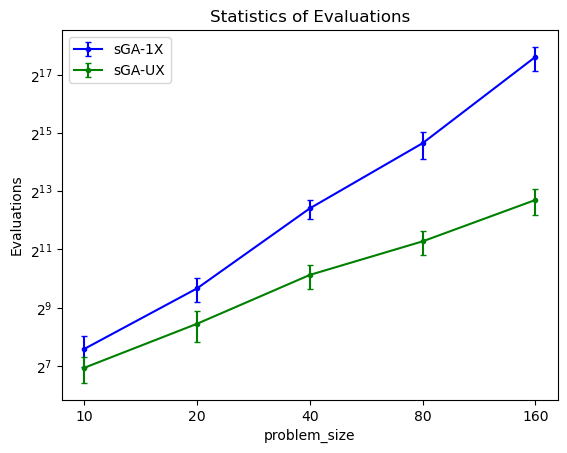

In [39]:
df = statisticize(onemax)
visualize_statistics(df, onemax)

In [41]:
df = pd.read_csv(f'results/statistics_result_{fitness_function.__name__}.csv', header=[0, 1])
df

sGA-1X                            sGA-UX  \
  Problem_size            MRPS       Evaluations            MRPS   
0           10    122.4 (37.7)     504.3 (191.2)   393.6 (109.0)   
1           20    331.2 (87.1)    3123.2 (983.5)  3891.2 (558.5)   
2           40   902.4 (129.4)  16486.4 (4834.5)      -1.0 (0.0)   
3           80  3328.0 (379.7)  84582.4 (4300.8)      -1.0 (0.0)   
4          160      -1.0 (0.0)        -1.0 (0.0)      -1.0 (0.0)   

                      
         Evaluations  
0     1331.2 (614.4)  
1  56934.4 (17031.7)  
2         -1.0 (0.0)  
3         -1.0 (0.0)  
4         -1.0 (0.0)

## Trap k=5

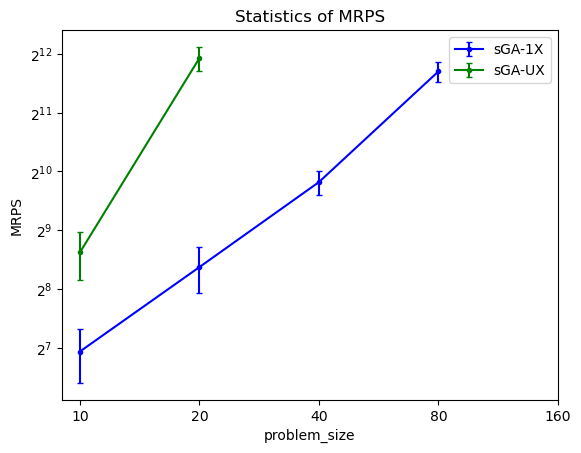

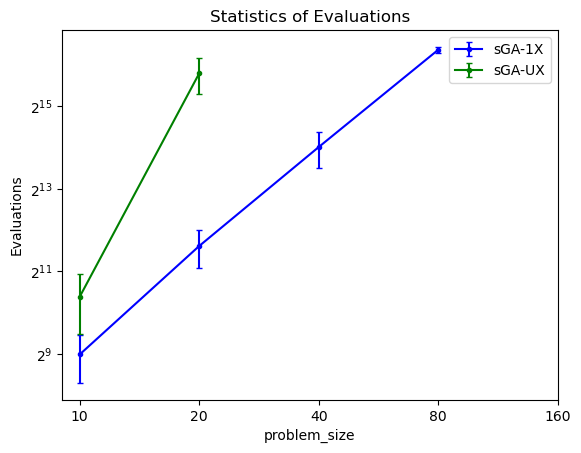

In [38]:
df = statisticize(trap5)
visualize_statistics(df, trap5)

In [42]:
df = pd.read_csv(f'results/statistics_result_{fitness_function.__name__}.csv', header=[0, 1])
df

sGA-1X                            sGA-UX  \
  Problem_size            MRPS       Evaluations            MRPS   
0           10    122.4 (37.7)     504.3 (191.2)   393.6 (109.0)   
1           20    331.2 (87.1)    3123.2 (983.5)  3891.2 (558.5)   
2           40   902.4 (129.4)  16486.4 (4834.5)      -1.0 (0.0)   
3           80  3328.0 (379.7)  84582.4 (4300.8)      -1.0 (0.0)   
4          160      -1.0 (0.0)        -1.0 (0.0)      -1.0 (0.0)   

                      
         Evaluations  
0     1331.2 (614.4)  
1  56934.4 (17031.7)  
2         -1.0 (0.0)  
3         -1.0 (0.0)  
4         -1.0 (0.0)